In [24]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt


<h1>Power production in Scandinavia vs the World<h1>

<h5>A quick study to investigate international and Scandinavian trends in power production between 2000 and 2020, with an emphasis on fossil versus renewable power sources.

Dataset aquired from https://www.kaggle.com/datasets/prateekmaj21/electricity-production-by-source-world/data



<h2> Data preparation

In [25]:
# Importing the dataset
production_data = pd.read_csv('electricity_production_by_source.csv')
# Inspecting the first few rows of the dataset
print(production_data.head(3))

        Entity Code  Year  Electricity from coal (TWh)  \
0  Afghanistan  AFG  2000                          0.0   
1  Afghanistan  AFG  2001                          0.0   
2  Afghanistan  AFG  2002                          0.0   

   Electricity from gas (TWh)  Electricity from hydro (TWh)  \
0                       0.155                         0.312   
1                       0.094                         0.498   
2                       0.132                         0.555   

   Electricity from other renewables (TWh)  Electricity from solar (TWh)  \
0                                      0.0                           0.0   
1                                      0.0                           0.0   
2                                      0.0                           0.0   

   Electricity from oil (TWh)  Electricity from wind (TWh)  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                      

In [26]:
# Inspecting the shape of the dataset
production_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Entity                                   6241 non-null   object 
 1   Code                                     5474 non-null   object 
 2   Year                                     6241 non-null   int64  
 3   Electricity from coal (TWh)              5221 non-null   float64
 4   Electricity from gas (TWh)               5221 non-null   float64
 5   Electricity from hydro (TWh)             6241 non-null   float64
 6   Electricity from other renewables (TWh)  6206 non-null   float64
 7   Electricity from solar (TWh)             6241 non-null   float64
 8   Electricity from oil (TWh)               5221 non-null   float64
 9   Electricity from wind (TWh)              6241 non-null   float64
 10  Electricity from nuclear (TWh)           6241 no

In [27]:
# Renaming columns for easier access
production_data.rename(columns={
                    'Entity': 'country',
                    'Code': 'code',
                    'Year': 'year', 
                    'Electricity from coal (TWh)': 'coal',
                    'Electricity from gas (TWh)': 'gas',
                    'Electricity from hydro (TWh)': 'hydro',
                    'Electricity from other renewables (TWh)': 'renewables',
                    'Electricity from solar (TWh)': 'solar',
                    'Electricity from oil (TWh)': 'oil',
                    'Electricity from wind (TWh)': 'wind',
                    'Electricity from nuclear (TWh)': 'nuclear'},
                    inplace=True)

# Checking the updated column names
production_data.info()
production_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     6241 non-null   object 
 1   code        5474 non-null   object 
 2   year        6241 non-null   int64  
 3   coal        5221 non-null   float64
 4   gas         5221 non-null   float64
 5   hydro       6241 non-null   float64
 6   renewables  6206 non-null   float64
 7   solar       6241 non-null   float64
 8   oil         5221 non-null   float64
 9   wind        6241 non-null   float64
 10  nuclear     6241 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 536.5+ KB


country          0
code           767
year             0
coal          1020
gas           1020
hydro            0
renewables      35
solar            0
oil           1020
wind             0
nuclear          0
dtype: int64

In [28]:
production_data.country.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia Pacific', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Central America',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'EU-27', 'EU27+1',
       'Eastern Africa', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'E

In [29]:
# Loading country codes dataset from https://www.kaggle.com/datasets/rafiaaa/country-names-with-short-codes-a2-a3-iso
countries = pd.read_csv('country_code.csv', encoding='latin-1')
# Inspecting the first few rows of the countries dataset
print(countries.head())



          Country Alpha-2 code Alpha-3 code  Numeric
0     Afghanistan           AF          AFG        4
1         Albania           AL          ALB        8
2         Algeria           DZ          DZA       12
3  American Samoa           AS          ASM       16
4         Andorra           AD          AND       20


In [30]:
# Removing entries in production_data that are not countries
production_data = production_data[production_data['code'].isin(countries['Alpha-3 code'])]
# Checking the shape of the updated dataset
production_data.info()
production_data.isnull().sum()
production_data.country.unique()

<class 'pandas.core.frame.DataFrame'>
Index: 5398 entries, 0 to 6240
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5398 non-null   object 
 1   code        5398 non-null   object 
 2   year        5398 non-null   int64  
 3   coal        4658 non-null   float64
 4   gas         4658 non-null   float64
 5   hydro       5398 non-null   float64
 6   renewables  5398 non-null   float64
 7   solar       5398 non-null   float64
 8   oil         4658 non-null   float64
 9   wind        5398 non-null   float64
 10  nuclear     5398 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.1+ KB


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Guiana', 'French Polynesia', 'Gabo

In [31]:
# Checking for duplicate entries in the dataset
duplicates = production_data[production_data.duplicated(subset=['country', 'year'], keep=False)]
# Displaying duplicate entries
print(duplicates)

Empty DataFrame
Columns: [country, code, year, coal, gas, hydro, renewables, solar, oil, wind, nuclear]
Index: []


In [32]:
# Assigning 0 to missing values in the dataset (DROPPED because it messed up the data)
#production_data.fillna(0, inplace=True)

# Dropping rows with missing values
production_data.dropna(inplace=True)

# Checking for missing values again
print(production_data.isnull().sum())

country       0
code          0
year          0
coal          0
gas           0
hydro         0
renewables    0
solar         0
oil           0
wind          0
nuclear       0
dtype: int64


This dataset had a noticable amount of missing values, most of them related to fossil power sources. This might affect the statistics in this analysis and will be an area of improvement in later revisions, but for now, these rows were dropped. The dataset also containsed a lot of different area codes and names. To tidy up the dataset further, areas not described in the ISO 3166 international standard were removed. 

<h2> World statistics

In [42]:
# Get the minimum and maximum years in the dataset
min_year = production_data['year'].min()
max_year = production_data['year'].max()

print(f"Time range of dataset: {min_year} to {max_year}")


Time range of dataset: 1985 to 2020


In [43]:
# Grouping by year and summing global production per source
grouped_world = production_data.groupby('year')[['coal', 'gas', 'hydro', 'renewables', 'solar', 'oil', 'wind', 'nuclear']].sum()

# Get the first and last year
first_year = grouped_world.index.min()
last_year = grouped_world.index.max()

# Calculate absolute and percentage change
change_summary = pd.DataFrame({
    'Start (TWh)': grouped_world.loc[first_year],
    'End (TWh)': grouped_world.loc[last_year],
})
change_summary['Change (TWh)'] = change_summary['End (TWh)'] - change_summary['Start (TWh)']
change_summary['Change (%)'] = (change_summary['Change (TWh)'] / change_summary['Start (TWh)']) * 100

# Display the result
print(f"Global electricity production change from {first_year} to {last_year}:")
print(change_summary.sort_values(by='Change (%)', ascending=False).round(2))


Global electricity production change from 1985 to 2020:
            Start (TWh)  End (TWh)  Change (TWh)   Change (%)
wind               0.01    1568.44       1568.44  22996908.27
solar              0.01     816.34        816.33   6949002.90
renewables        62.35     647.60        585.25       938.64
gas             1168.16    4725.38       3557.21       304.51
hydro           1379.13    3897.21       2518.07       182.58
coal            3394.29    8405.00       5010.71       147.62
nuclear         1079.75    2614.66       1534.91       142.15
oil              854.73     692.10       -162.63       -19.03


In [33]:
# Summing the electricity production by source for each year worldwide
coal = production_data.groupby('year')['coal'].sum()
gas = production_data.groupby('year')['gas'].sum()
hydro = production_data.groupby('year')['hydro'].sum()
renewables = production_data.groupby('year')['renewables'].sum()
solar = production_data.groupby('year')['solar'].sum()
oil = production_data.groupby('year')['oil'].sum()
wind = production_data.groupby('year')['wind'].sum()
nuclear = production_data.groupby('year')['nuclear'].sum()


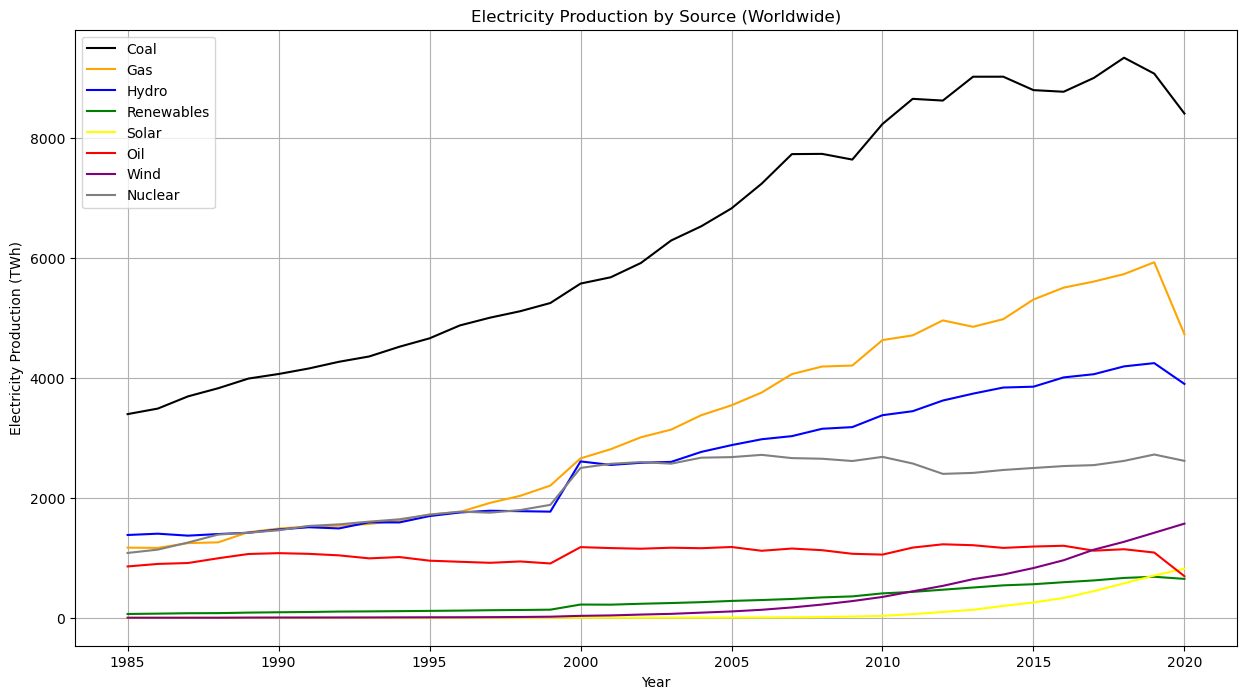

In [34]:
# Creating a line plot to visualize the electricity production by source over the years
plt.figure(figsize=(15, 8))
plt.plot(coal.index, coal.values, label='Coal', color='black')
plt.plot(gas.index, gas.values, label='Gas', color='orange')
plt.plot(hydro.index, hydro.values, label='Hydro', color='blue')
plt.plot(renewables.index, renewables.values, label='Renewables', color='green')
plt.plot(solar.index, solar.values, label='Solar', color='yellow')
plt.plot(oil.index, oil.values, label='Oil', color='red')
plt.plot(wind.index, wind.values, label='Wind', color='purple')
plt.plot(nuclear.index, nuclear.values, label='Nuclear', color='gray')
plt.title('Electricity Production by Source (Worldwide)')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()


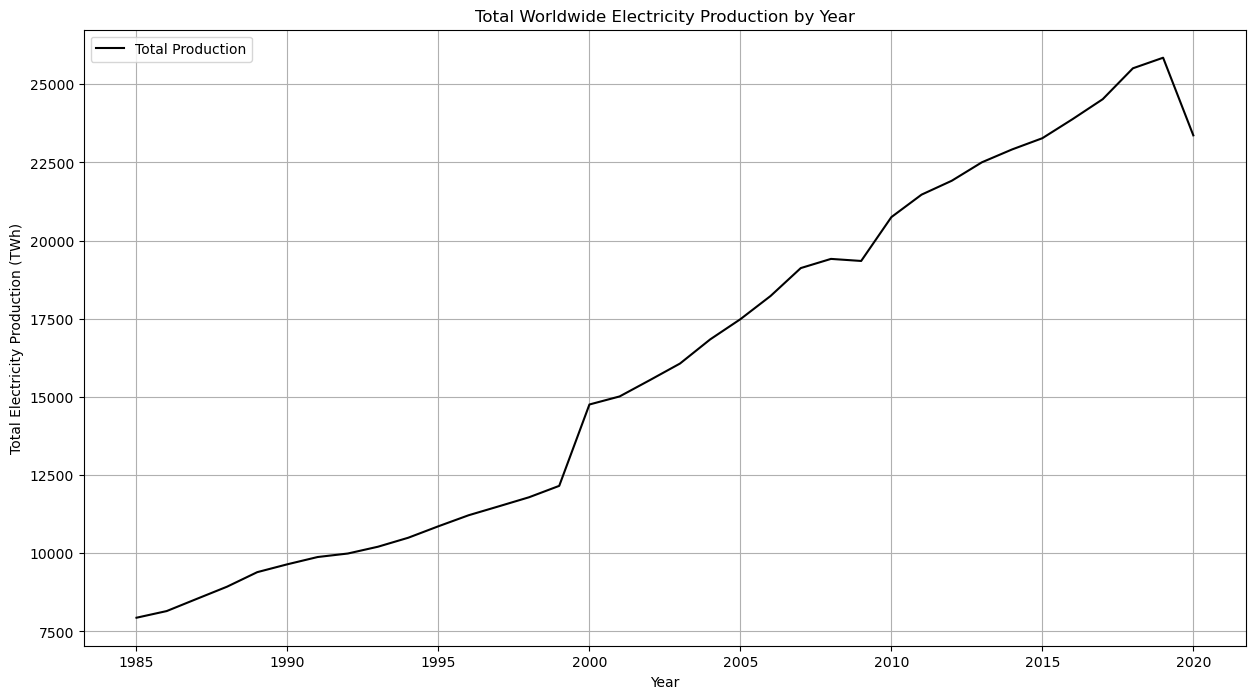

In [35]:
# Creating a line plot to visualize the total worldwide electricity production by year
total_production = production_data.groupby('year')[['coal', 'gas', 'hydro', 'renewables', 'solar', 'oil', 'wind', 'nuclear']].sum().sum(axis=1)
plt.figure(figsize=(15, 8))
plt.plot(total_production.index, total_production.values, label='Total Production', color='black')
plt.title('Total Worldwide Electricity Production by Year')
plt.xlabel('Year')
plt.ylabel('Total Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()


<h5> The noticable decrease in electricity production reported from 2019 - 2020 suggests that the 2020 data might be incomplete. However, the decrease in coal and oil production started back in 2018, indicating that these sources of electricity might indeed be on a downward trend. Despite the probability of incomplete data, wind and solar electricity sources are both clearly ascending, indicating that renewables sources are gaining momentum world wide. 

<h2> Scandinavian Statistics

In [44]:
# Function to calculate change summary for a given country
def production_change_by_country(country_name):
    country_data = production_data[production_data['country'] == country_name]
    grouped = country_data.groupby('year')[['coal', 'gas', 'hydro', 'renewables', 'solar', 'oil', 'wind', 'nuclear']].sum()
    
    first_year = grouped.index.min()
    last_year = grouped.index.max()
    
    summary = pd.DataFrame({
        'Start (TWh)': grouped.loc[first_year],
        'End (TWh)': grouped.loc[last_year],
    })
    summary['Change (TWh)'] = summary['End (TWh)'] - summary['Start (TWh)']
    summary['Change (%)'] = (summary['Change (TWh)'] / summary['Start (TWh)'].replace(0, float('nan'))) * 100
    
    print(f"\nElectricity production change in {country_name} from {first_year} to {last_year}:")
    print(summary.sort_values(by='Change (%)', ascending=False).round(2))

# Apply for each country
production_change_by_country('Norway')
production_change_by_country('Sweden')
production_change_by_country('Denmark')



Electricity production change in Norway from 2000 to 2020:
            Start (TWh)  End (TWh)  Change (TWh)  Change (%)
wind               0.03       9.32          9.29    29968.05
gas                0.27       1.66          1.38      503.73
renewables         0.29       0.67          0.38      132.97
solar              0.01       0.01          0.00       30.00
hydro            140.40     131.88         -8.52       -6.07
coal               0.00       0.00          0.00         NaN
oil                0.00       0.09          0.09         NaN
nuclear            0.00       0.00          0.00         NaN

Electricity production change in Sweden from 2000 to 2020:
            Start (TWh)  End (TWh)  Change (TWh)  Change (%)
solar              0.00       0.41          0.41    28602.40
wind               0.46      27.28         26.83     5870.14
renewables         4.10      10.69          6.59      160.83
oil                2.66       2.94          0.28       10.62
hydro             78.58   

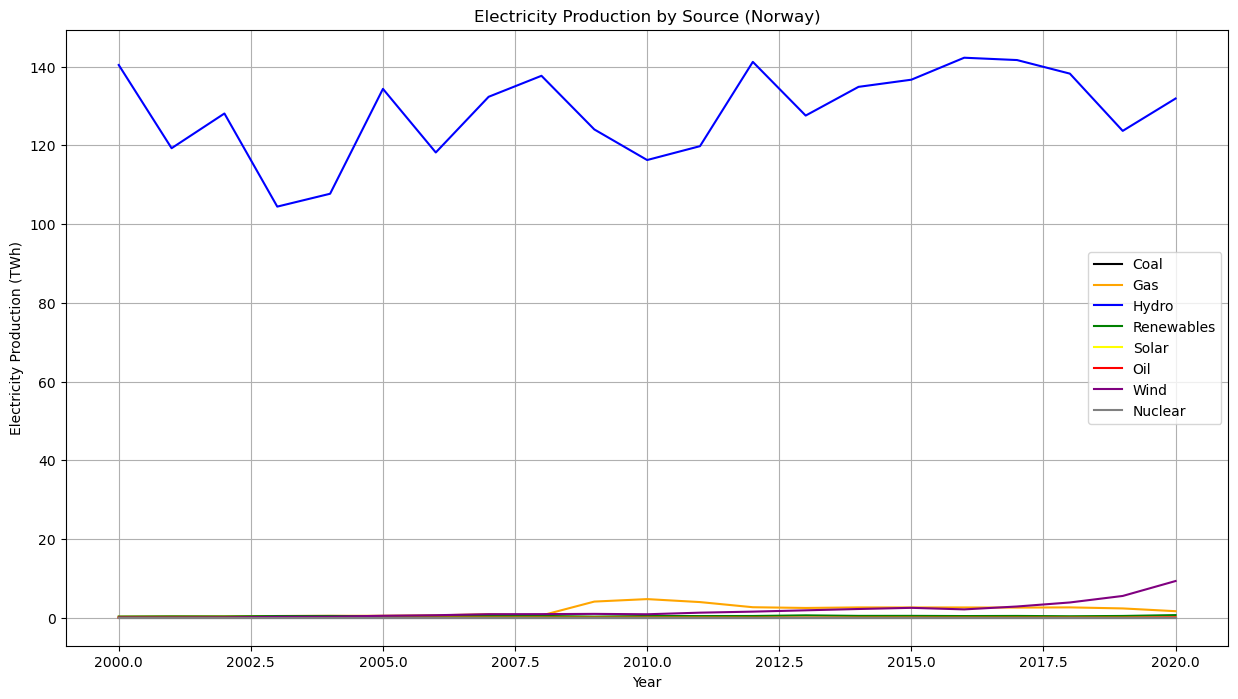

In [36]:
# Creating a line plot to visualize the electricity production by source over the years in Norway
norway_data = production_data[production_data['country'] == 'Norway']
plt.figure(figsize=(15, 8))
plt.plot(norway_data['year'], norway_data['coal'], label='Coal', color='black')
plt.plot(norway_data['year'], norway_data['gas'], label='Gas', color='orange')
plt.plot(norway_data['year'], norway_data['hydro'], label='Hydro', color='blue')
plt.plot(norway_data['year'], norway_data['renewables'], label='Renewables', color='green')
plt.plot(norway_data['year'], norway_data['solar'], label='Solar', color='yellow')
plt.plot(norway_data['year'], norway_data['oil'], label='Oil', color='red')
plt.plot(norway_data['year'], norway_data['wind'], label='Wind', color='purple')
plt.plot(norway_data['year'], norway_data['nuclear'], label='Nuclear', color='gray')
plt.title('Electricity Production by Source (Norway)')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()

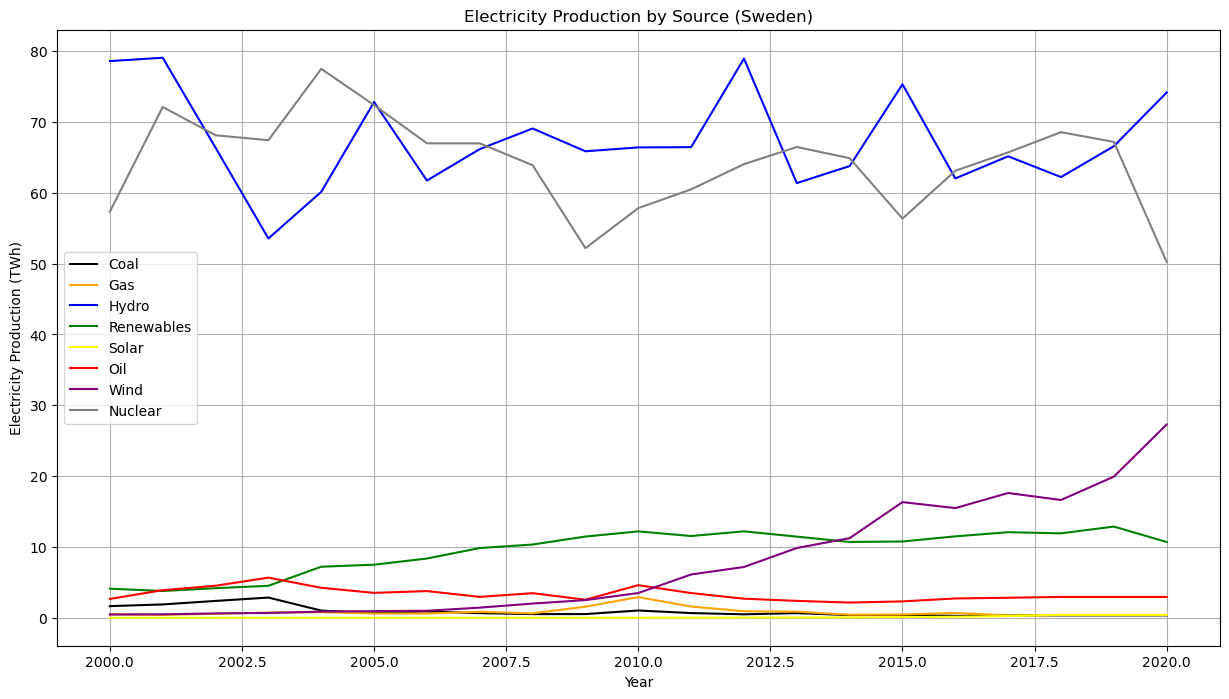

In [37]:
# Creating a line plot to visualize the electricity production by source over the years in Sweden
sweden_data = production_data[production_data['country'] == 'Sweden']
plt.figure(figsize=(15, 8))
plt.plot(sweden_data['year'], sweden_data['coal'], label='Coal', color='black')
plt.plot(sweden_data['year'], sweden_data['gas'], label='Gas', color='orange')
plt.plot(sweden_data['year'], sweden_data['hydro'], label='Hydro', color='blue')
plt.plot(sweden_data['year'], sweden_data['renewables'], label='Renewables', color='green')
plt.plot(sweden_data['year'], sweden_data['solar'], label='Solar', color='yellow')
plt.plot(sweden_data['year'], sweden_data['oil'], label='Oil', color='red')
plt.plot(sweden_data['year'], sweden_data['wind'], label='Wind', color='purple')
plt.plot(sweden_data['year'], sweden_data['nuclear'], label='Nuclear', color='gray')
plt.title('Electricity Production by Source (Sweden)')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()

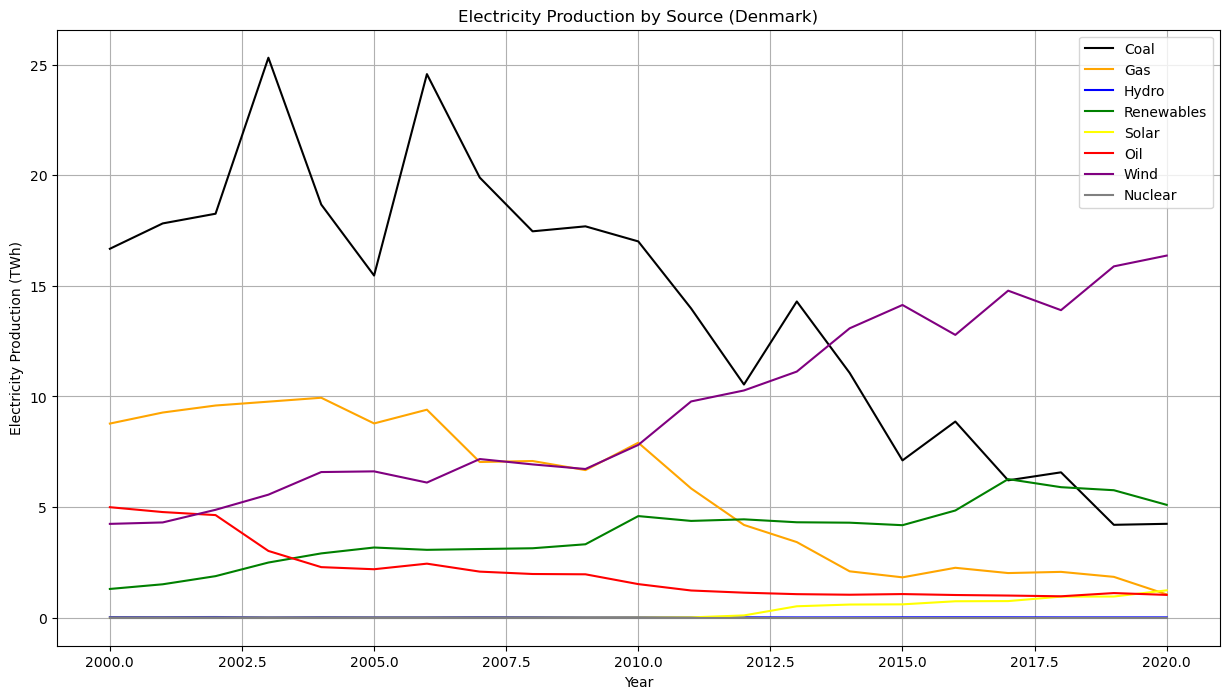

In [38]:
# Creating a line plot to visualize the electricity production by source over the years in Denmark
denmark_data = production_data[production_data['country'] == 'Denmark']
plt.figure(figsize=(15, 8)) 
plt.plot(denmark_data['year'], denmark_data['coal'], label='Coal', color='black')
plt.plot(denmark_data['year'], denmark_data['gas'], label='Gas', color='orange')
plt.plot(denmark_data['year'], denmark_data['hydro'], label='Hydro', color='blue')
plt.plot(denmark_data['year'], denmark_data['renewables'], label='Renewables', color='green')
plt.plot(denmark_data['year'], denmark_data['solar'], label='Solar', color='yellow')
plt.plot(denmark_data['year'], denmark_data['oil'], label='Oil', color='red')
plt.plot(denmark_data['year'], denmark_data['wind'], label='Wind', color='purple')
plt.plot(denmark_data['year'], denmark_data['nuclear'], label='Nuclear', color='gray')
plt.title('Electricity Production by Source (Denmark)')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()

<h5> Norway produces by far most electricity from hydro sources, which is not surprising given the Norwegian topography. Sweden's main production is split between hydro and nuclear, which seems to be adding up to about the same total production as Norway. Denmark, on the other hand, seems to be phaseing out their coal production and increasing production from wind rapidly. However, Denmark's production is at a much smaller scale. 

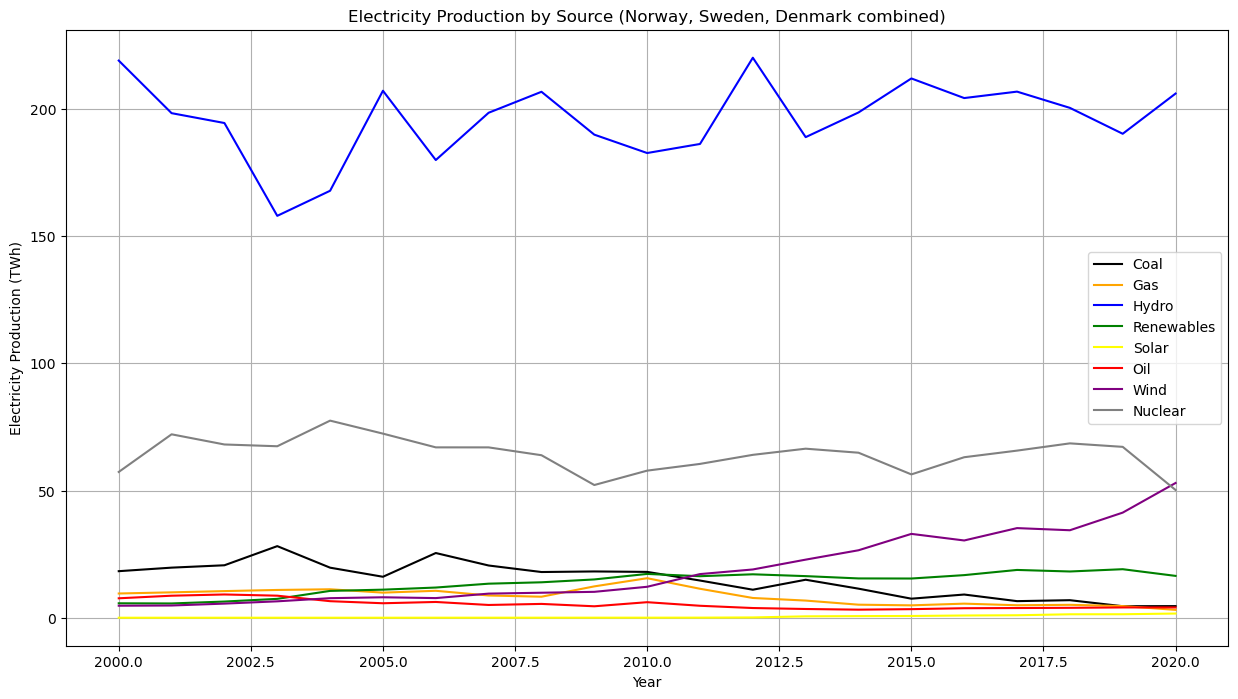

In [41]:
# Creating a line plot to visualize the electricity production by source over the years in Norway, Sweden, and Denmark combined
combined_data = production_data[production_data['country'].isin(['Norway', 'Sweden', 'Denmark'])] \
    .groupby('year')[['coal', 'gas', 'hydro', 'renewables', 'solar', 'oil', 'wind', 'nuclear']].sum().reset_index()
plt.figure(figsize=(15, 8))
plt.plot(combined_data['year'], combined_data['coal'], label='Coal', color='black')
plt.plot(combined_data['year'], combined_data['gas'], label='Gas', color='orange')
plt.plot(combined_data['year'], combined_data['hydro'], label='Hydro', color='blue')
plt.plot(combined_data['year'], combined_data['renewables'], label='Renewables', color='green')
plt.plot(combined_data['year'], combined_data['solar'], label='Solar', color='yellow')
plt.plot(combined_data['year'], combined_data['oil'], label='Oil', color='red')
plt.plot(combined_data['year'], combined_data['wind'], label='Wind', color='purple')
plt.plot(combined_data['year'], combined_data['nuclear'], label='Nuclear', color='gray')
plt.title('Electricity Production by Source (Norway, Sweden, Denmark combined)')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()


As we can see, hydro is the dominating source of electricity production in Scandinavia. Nuclear production seems to be decreasing, but data from the following years would be needed to determine whether this is an established trend. Wind production is on the other hand increasing rapidly in all three countries, and fossil sources are hardly used. This is quite the contrast to the worlds total production, where coal and gas remains the dominating sources. 

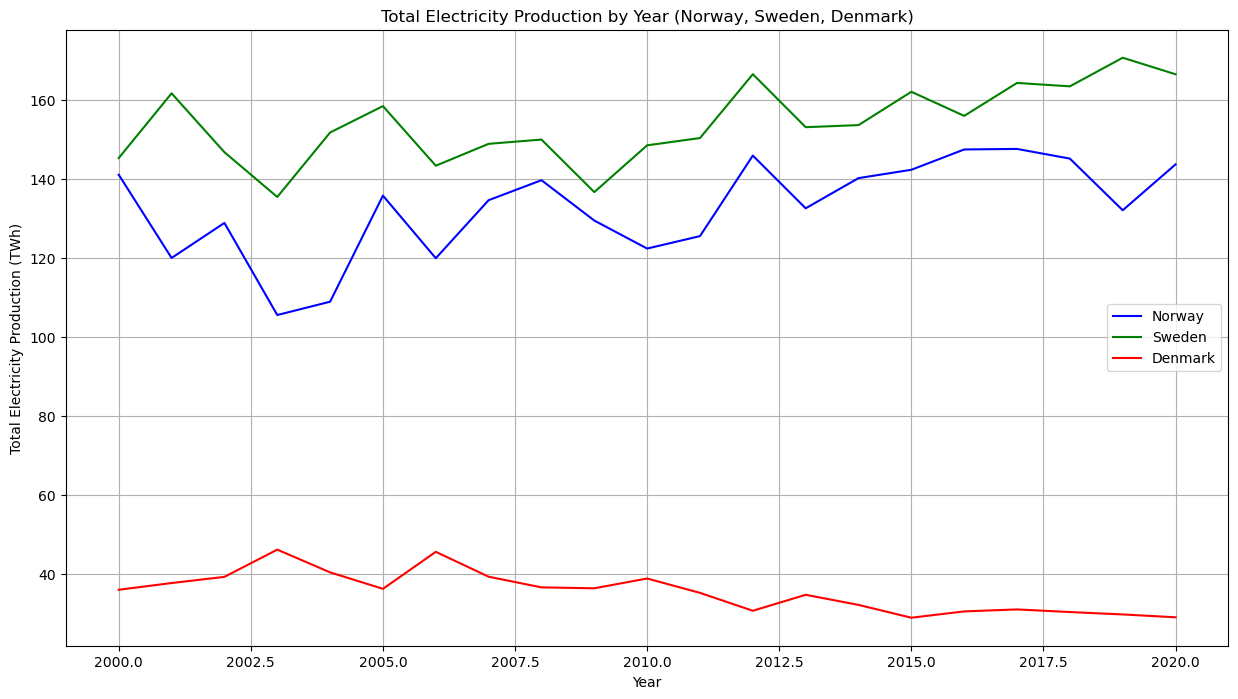

In [40]:
# Comparing total electricity production by year for Norway, Sweden, Denmark and world average
plt.figure(figsize=(15, 8))
plt.plot(norway_data['year'], norway_data['coal'] + norway_data['gas'] + norway_data['hydro'] + norway_data['renewables'] + norway_data['solar'] + norway_data['oil'] + norway_data['wind'] + norway_data['nuclear'], label='Norway', color='blue')
plt.plot(sweden_data['year'], sweden_data['coal'] + sweden_data['gas'] + sweden_data['hydro'] + sweden_data['renewables'] + sweden_data['solar'] + sweden_data['oil'] + sweden_data['wind'] + sweden_data['nuclear'], label='Sweden', color='green')
plt.plot(denmark_data['year'], denmark_data['coal'] + denmark_data['gas'] + denmark_data['hydro'] + denmark_data['renewables'] + denmark_data['solar'] + denmark_data['oil'] + denmark_data['wind'] + denmark_data['nuclear'], label='Denmark', color='red')
plt.title('Total Electricity Production by Year (Norway, Sweden, Denmark)')
plt.xlabel('Year')
plt.ylabel('Total Electricity Production (TWh)')
plt.legend()
plt.grid()
plt.show()

<h5> Comparing the total production by country makes it clearer how small Denmark's production is compared to Norway and Sweden's, and it is also the only one to decrease over time. Given Denmark's location south of the Baltic and North sea and bordering Germany, Denmarks import and consumption of electricity is worth investigating further.